In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


In [ ]:

# 1. Load the dataset
max_features = 10000  # Number of words to consider as features (top 10k)
maxlen = 500  # Cut texts after this number of words (for padding)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# 2. Preprocess the data (pad sequences)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [ ]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(LSTM(32))  # LSTM instead of SimpleRNN
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 282ms/step - accuracy: 0.6323 - loss: 0.6143 - val_accuracy: 0.8374 - val_loss: 0.3756
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 262ms/step - accuracy: 0.8535 - loss: 0.3523 - val_accuracy: 0.8558 - val_loss: 0.3962
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 260ms/step - accuracy: 0.8870 - loss: 0.2886 - val_accuracy: 0.8314 - val_loss: 0.4031
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.9060 - loss: 0.2465 - val_accuracy: 0.8702 - val_loss: 0.3462
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.9136 - loss: 0.2207 - val_accuracy: 0.8606 - val_loss: 0.3141


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8640 - loss: 0.3157
Test accuracy: 0.8661


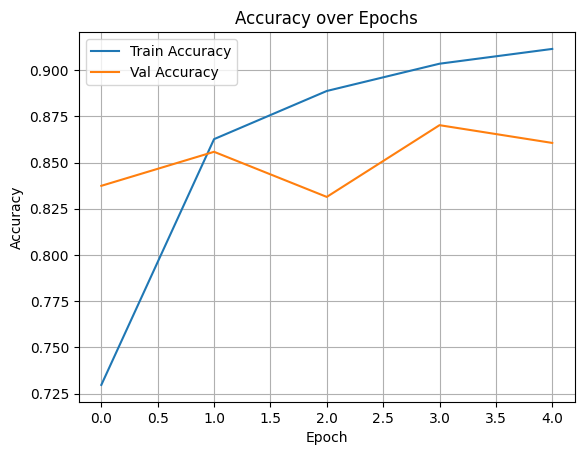

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()